In [52]:
import os
import numpy as np
import pandas as pd
import h5py 

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
ophys_session_dir = r"\\allen\programs\braintv\production\neuralcoding\prod0\specimen_589751223\ophys_session_613372897"

In [54]:
analysis_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\BehaviorImaging\DoC\2P6_data_analysis'

In [55]:
mouse_id = 318631

In [56]:
from visual_behavior_ophys.dataset.visual_behavior_scientifica_dataset import VisualBehaviorScientificaDataset

In [57]:
dataset= VisualBehaviorScientificaDataset(ophys_session_dir, mouse_id, analysis_dir = analysis_dir)

Visual frames detected in sync: 215788
2P frames detected in sync: 111632
170825
visual frames in pkl file: 215788
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M318631\output\170825150722-task=DoC_NaturalImages_Ophys_SessionA_stage=natural_images_ophys_sessionA_mouse=M318631.pkl
stim type is  images
filter edge cells = True
length of traces: 111620
number of segmented cells: 166


In [81]:
dataset.sync

{'2PFrames': {'timestamps': array([  161.85603,   161.88832,   161.92061, ...,  3769.45546,
          3769.48779,  3769.52011])},
 'cam1_exposure': {'timestamps': array([  4.53840000e-01,   4.93370000e-01,   5.01360000e-01, ...,
           3.77014473e+03,   3.77017819e+03,   3.77021241e+03])},
 'cam2_exposure': {'timestamps': array([  4.00360000e-01,   4.45450000e-01,   4.52110000e-01, ...,
           3.76979226e+03,   3.76982904e+03,   3.76986004e+03])},
 'lickTimes_0': {'timestamps': array([  160.21885,   164.18589,   166.43565, ...,  3770.46297,
          3770.59726,  3770.71344])},
 'stim_photodiode': {'timestamps': array([  170.50762,   172.50926,   174.51088, ...,  3763.96025,
          3765.9619 ,  3767.96352])},
 'trigger': {'timestamps': array([ 159.45151])},
 'visualFrames': {'timestamps': array([  169.48386,   169.50032,   169.51698, ...,  3769.35813,
          3769.37482,  3769.39152])}}

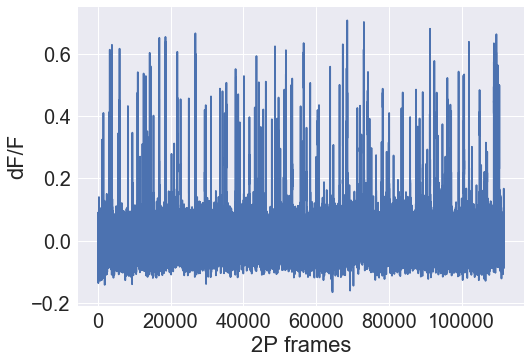

In [85]:
plt.plot(dataset.dff_traces[22])
plt.ylabel('dF/F')
plt.xlabel('2P frames')

In [87]:
dataset.running_speed

array([        nan,         nan,         nan, ..., -0.0513877 ,
       -0.03479007, -0.01819245])

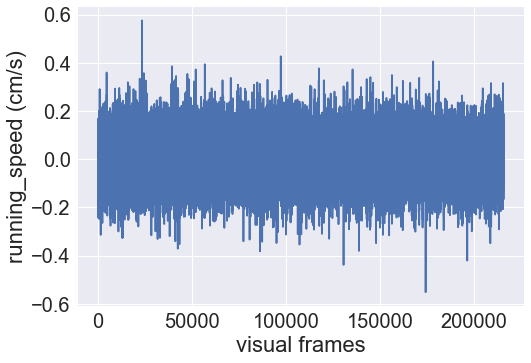

In [86]:
plt.plot(dataset.running_speed)
plt.ylabel('running_speed (cm/s)')
plt.xlabel('visual frames')

In [83]:
dataset.stim_table.head()

,change_trial,total_trial,change_frame,change_time,initial_code,change_code,initial_image,change_image,trial_type,behavioral_response,behavioral_response_type
0,0,1,225,173.23651,2,1,img063_VH.tiff,img062_VH.tiff,go,1.0,HIT
1,1,3,810,182.99440,1,5,img062_VH.tiff,img069_VH.tiff,go,1.0,HIT
2,2,16,3240,223.52757,5,0,img069_VH.tiff,img061_VH.tiff,go,0.0,MISS
3,3,20,3780,232.53484,0,6,img061_VH.tiff,img077_VH.tiff,go,0.0,MISS
4,4,36,6435,276.82095,6,3,img077_VH.tiff,img065_VH.tiff,go,1.0,HIT


In [ ]:
from visual_behavior_ophys.plotting_tools import summary_figures as sf

In [ ]:
sf.plot_traces_heatmap(dataset, save=True, cbar=True, ax=None)

In [58]:
from visual_behavior_ophys.response_analysis.response_analysis import ResponseAnalysis 

In [59]:
ra = ResponseAnalysis(dataset)

length of traces: 111620
number of segmented cells: 166
loading response dataframe
done


In [60]:
rdf = ra.get_response_dataframe()
dataset.response_df = rdf

loading response dataframe
done


In [61]:
rdf.head()

,cell,trial,response,response_timestamps,response_window_mean,baseline_window_mean,p_value,sd_over_baseline,run_speed,run_timestamps,...,total_trial,change_frame,change_time,initial_code,change_code,initial_image,change_image,trial_type,behavioral_response,behavioral_response_type
0,0,0,"[-0.0147577514832, 0.118226349698, -0.09299253...","[169.25162, 169.28392, 169.31621, 169.34851, 1...",0.068741,0.139134,0.002829,1.063204,"[nan, nan, nan, nan, nan, -0.0198383121705, -0...","[169.48386, 169.50032, 169.51698, 169.53365, 1...",...,1,225,173.23651,2,1,img063_VH.tiff,img062_VH.tiff,go,1.0,HIT
1,1,0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[169.25162, 169.28392, 169.31621, 169.34851, 1...",NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, -0.0198383121705, -0...","[169.48386, 169.50032, 169.51698, 169.53365, 1...",...,1,225,173.23651,2,1,img063_VH.tiff,img062_VH.tiff,go,1.0,HIT
2,2,0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[169.25162, 169.28392, 169.31621, 169.34851, 1...",NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, -0.0198383121705, -0...","[169.48386, 169.50032, 169.51698, 169.53365, 1...",...,1,225,173.23651,2,1,img063_VH.tiff,img062_VH.tiff,go,1.0,HIT
3,3,0,"[-0.0431678445102, -0.0506523371426, -0.034747...","[169.25162, 169.28392, 169.31621, 169.34851, 1...",0.083637,0.180866,0.000055,1.195086,"[nan, nan, nan, nan, nan, -0.0198383121705, -0...","[169.48386, 169.50032, 169.51698, 169.53365, 1...",...,1,225,173.23651,2,1,img063_VH.tiff,img062_VH.tiff,go,1.0,HIT
4,4,0,"[-0.0747522107245, -0.0392785888808, -0.018355...","[169.25162, 169.28392, 169.31621, 169.34851, 1...",-0.024168,-0.011976,0.538027,-0.422613,"[nan, nan, nan, nan, nan, -0.0198383121705, -0...","[169.48386, 169.50032, 169.51698, 169.53365, 1...",...,1,225,173.23651,2,1,img063_VH.tiff,img062_VH.tiff,go,1.0,HIT


In [62]:
from visual_behavior_ophys.plotting_tools import summary_figures as sf

In [63]:
sf.plot_behavior_events_trace(dataset, range(dataset.dff_traces.shape[0]), xmin=360, length=6, ax=None, save=True)

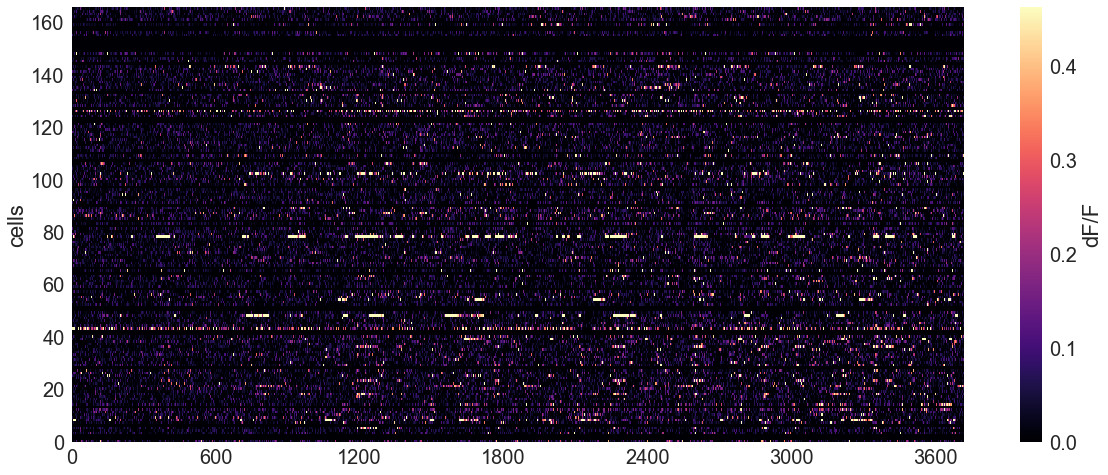

In [65]:
from visual_behavior_ophys.plotting_tools import basic_plotting as bp

In [66]:
for roi in range(dataset.dff_traces.shape[0]):
    figsize=(20, 5)
    fig,ax = plt.subplots(figsize=figsize)
    bp.plot_trace(dataset.dff_traces[roi], ylabel='dF/F', interval=5, ax=ax)
    sf.save_figure(fig, figsize, dataset.analysis_dir, 'dff_traces', 'roi_'+str(roi), formats=['.png'])
    plt.close()